# 서울시 주요 공원 현황 다루기

In [1]:
import pandas as pd
import time 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [3]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [4]:
import folium
import json

In [5]:
import requests
from urllib.parse import urlparse,quote

In [6]:
geo_path = '../05.Crawling/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf8'))

In [7]:
park = pd.read_csv('./data/서울시 주요 공원현황.csv',encoding='euc-kr')
park.head()

,공원번호,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,3,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120,448852.675,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do
2,4,서울대공원,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,9132690m²,1984.5.1,동물원 식물원 테마가든(장미원 어린이동물원 피크닉장) 치유숲 산림욕장 캠핑장 국립현...,NaN,NaN,지하철 4호선 대공원역 하차(2번 출구) 도보 15분 정도 문의처 02)500-73...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,과천시,경기도 과천시 대공원광장로 102,전략기획실,02-500-7032,200994.267,437163.981,127.019847,37.426449,http://grandpark.seoul.go.kr/
3,5,서울숲,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,480994㎡,2005.6.18,4개 테마공원: 문화예술공원 자연생태숲 자연체험학습원 습지생태원 주요시설: 가족마당...,수 목 : 소나무 섬잣나무 계수나무 외 95종 415795주 식물원 : 선인장 등 ...,http://parks.seoul.go.kr/template/common/img/p...,NaN,지하철 분당선 서울숲역 3번출구 도보로 약5분 2호선 뚝섬역 8번출구 도보로 약 1...,http://parks.seoul.go.kr/file/info/view.do?fId...,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,02-460-2905,203695.432,449290.726,127.041798,37.543072,http://parks.seoul.go.kr/template/sub/seoulfor...
4,6,월드컵공원,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,2284085㎡,2002.5.1,평화의 공원 월드컵공원전시관(879㎡) 유니세프광장(2400㎡) 평화광장(5217㎡...,NaN,http://parks.seoul.go.kr/template/common/img/p...,지하철 6호선 월드컵경기장역 하차 → 1번 출구로 나온 후 직진 → 큰길(도로)이 ...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,02-300-5500,190658.070,451598.831,126.878907,37.571805,http://parks.seoul.go.kr/template/sub/worldcup...


In [8]:
park = park[['공원명','면적','공원주소','Y좌표(WGS84)','X좌표(WGS84)']]

In [9]:
park.head()

,공원명,면적,공원주소,Y좌표(WGS84),X좌표(WGS84)
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377
1,길동생태공원,80683㎡,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779
2,서울대공원,9132690m²,경기도 과천시 대공원광장로 102,37.426449,127.019847
3,서울숲,480994㎡,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798
4,월드컵공원,2284085㎡,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907


In [10]:
park.rename({
    'Y좌표(WGS84)' : 'lat',
    'X좌표(WGS84)' : 'lng'
},inplace=True,axis=1)
park

,공원명,면적,공원주소,lat,lng
0,남산도시자연공원,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377
1,길동생태공원,80683㎡,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779
2,서울대공원,9132690m²,경기도 과천시 대공원광장로 102,37.426449,127.019847
3,서울숲,480994㎡,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798
4,월드컵공원,2284085㎡,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907
...,...,...,...,...,...
127,용마도시자연공원(사가정공원),109635㎡,서울특별시 중랑구 면목7동 산50,37.579762,127.095997
128,문화비축기지,140022㎡,서울특별시 마포구 증산로 87,37.571718,126.893245
129,경춘선숲길,211392㎡,노원구 공릉2동 산 82-2,37.627077,127.076482
130,율현공원,157535㎡,서울특별시 강남구 율현동 밤고개로24길(율현동 56),37.472332,127.115594


In [11]:
park.to_csv('tmp.csv',sep=',',encoding='utf8')

In [13]:
park['면적']=park['면적'].str.extract('(^\d*)')[0].tolist()

In [14]:
park.head()

,공원명,면적,공원주소,lat,lng
0,남산도시자연공원,2896887,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377
1,길동생태공원,80683,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779
2,서울대공원,9132690,경기도 과천시 대공원광장로 102,37.426449,127.019847
3,서울숲,480994,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798
4,월드컵공원,2284085,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907


In [15]:
# 지역구 예외찾기
for i in park.index:
    try:
        if park['공원주소'][i].split()[1].find('구')<0:
            print(park['공원명'][i],i)
    except:print(park['공원명'][i],i)

서울대공원 2
경춘선숲길 129
서울로7017 131


In [16]:
park['공원주소'][2],park['공원주소'][129],park['공원주소'][131]

('경기도 과천시 대공원광장로 102', '노원구 공릉2동 산 82-2', '서울로7017')

In [17]:
# 과천시 공원 제거
park.drop([2],inplace=True)

In [18]:
park.reset_index(drop=True,inplace=True)
park.head()

,공원명,면적,공원주소,lat,lng
0,남산도시자연공원,2896887,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377
1,길동생태공원,80683,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779
2,서울숲,480994,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798
3,월드컵공원,2284085,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907
4,광화문시민열린마당,8948,서울특별시 종로구 세종로 76-2,37.575045,126.978023


In [19]:
# 주소 없는 서울로2017
key_fd = open('../06.RestAPI/roadapikey.txt', mode='r')
roadapi_key = key_fd.read(100)
key_fd.close()

In [20]:
road_url = 'https://www.juso.go.kr/addrlink/addrLinkApi.do'
url = f'{road_url}?confmKey={roadapi_key}&currentPage=1&countPerPage=10&keyword={quote("서울로7017")}&resultType=json'
results = requests.get(url).json()
results

{'results': {'common': {'errorMessage': '정상',
   'countPerPage': '10',
   'totalCount': '1',
   'errorCode': '0',
   'currentPage': '1'},
  'juso': [{'detBdNmList': '',
    'engAddr': '33, Toegye-ro, Jung-gu, Seoul',
    'rn': '퇴계로',
    'emdNm': '남대문로5가',
    'zipNo': '04528',
    'roadAddrPart2': ' (남대문로5가)',
    'emdNo': '02',
    'sggNm': '중구',
    'jibunAddr': '서울특별시 중구 남대문로5가 67-4 서울로7017편의시설',
    'siNm': '서울특별시',
    'roadAddrPart1': '서울특별시 중구 퇴계로 33',
    'bdNm': '서울로7017편의시설',
    'admCd': '1114011800',
    'udrtYn': '0',
    'lnbrMnnm': '67',
    'roadAddr': '서울특별시 중구 퇴계로 33 (남대문로5가)',
    'lnbrSlno': '4',
    'buldMnnm': '33',
    'bdKdcd': '0',
    'liNm': '',
    'rnMgtSn': '111403101011',
    'mtYn': '0',
    'bdMgtSn': '1114011200102360002000001',
    'buldSlno': '0'}]}}

In [21]:
addr_list = results['results']['juso']
addr = addr_list[0]
addr['roadAddr']

'서울특별시 중구 퇴계로 33 (남대문로5가)'

In [22]:
park.iloc[130,2] = addr['roadAddr']

In [23]:
park.tail()

,공원명,면적,공원주소,lat,lng
126,용마도시자연공원(사가정공원),109635,서울특별시 중랑구 면목7동 산50,37.579762,127.095997
127,문화비축기지,140022,서울특별시 마포구 증산로 87,37.571718,126.893245
128,경춘선숲길,211392,노원구 공릉2동 산 82-2,37.627077,127.076482
129,율현공원,157535,서울특별시 강남구 율현동 밤고개로24길(율현동 56),37.472332,127.115594
130,서울로7017,NaN,서울특별시 중구 퇴계로 33 (남대문로5가),NaN,NaN


In [24]:
gu_list = []
for i in park.index:
    if park['공원주소'][i].split()[1].find('구')>=0:
        gu_list.append(park['공원주소'][i].split()[1])
    else:
        gu_list.append(park['공원주소'][i].split()[0])

In [25]:
park['지역구'] = gu_list
park.tail()

,공원명,면적,공원주소,lat,lng,지역구
126,용마도시자연공원(사가정공원),109635,서울특별시 중랑구 면목7동 산50,37.579762,127.095997,중랑구
127,문화비축기지,140022,서울특별시 마포구 증산로 87,37.571718,126.893245,마포구
128,경춘선숲길,211392,노원구 공릉2동 산 82-2,37.627077,127.076482,노원구
129,율현공원,157535,서울특별시 강남구 율현동 밤고개로24길(율현동 56),37.472332,127.115594,강남구
130,서울로7017,NaN,서울특별시 중구 퇴계로 33 (남대문로5가),NaN,NaN,중구


In [26]:
key_fd = open('../06.RestAPI/kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [27]:
addr = park['공원주소'][130]
url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + quote(addr)
result = requests.get(url,
            headers = {"Authorization": "KakaoAK " + kmap_key}).json()
lat = float(result['documents'][0]['y'])
lng = float(result['documents'][0]['x'])

In [28]:
park['lat'][130] = lat
park['lng'][130] = lng

In [29]:
park.isnull().any() # 빈칸 찾기

공원명     False
면적       True
공원주소    False
lat     False
lng     False
지역구     False
dtype: bool

In [30]:
for i in park.index:
    if type(park['면적'][i]) == float:
        print(i)

108
118
130


In [31]:
park['공원명'][108],park['공원명'][118],park['공원명'][130]

('푸른수목원', '문화역 서울284', '서울로7017')

In [32]:
park['공원명'][118] = '문화역 서울284'

In [33]:
park['공원명'][130] = '서울로7017'

In [51]:
# 면적 검색해서 채워넣기
park['면적'][108] = '103354'

In [52]:
park['면적'][118] = '2964'

In [53]:
park['면적'][130] = '22862'

In [37]:
park.isnull().any()

공원명     False
면적      False
공원주소    False
lat     False
lng     False
지역구     False
dtype: bool

In [58]:
for i in park.index:
    if park['면적'][i] == '':
        print(park['공원명'][i],i)

진관근린공원(구파발폭포) 5
감로천생태공원(관악산) 24
자매근린공원 49
올림픽공원 63


In [59]:
park['면적'][5] = '983.791'
park['면적'][24] = '80683'
park['면적'][49] = ' 16500'
park['면적'][63] = '1447122'

In [60]:
# 서울특별시 안 붙은 공원주소 넣기
park['공원주소'][128] = '서울특별시 노원구 공릉2동 산 82-2'

In [61]:
park

,공원명,면적,공원주소,lat,lng,지역구
0,남산도시자연공원,2896887,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377,중구
1,길동생태공원,80683,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779,강동구
2,서울숲,480994,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798,성동구
3,월드컵공원,2284085,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907,마포구
4,광화문시민열린마당,8948,서울특별시 종로구 세종로 76-2,37.575045,126.978023,종로구
...,...,...,...,...,...,...
126,용마도시자연공원(사가정공원),109635,서울특별시 중랑구 면목7동 산50,37.579762,127.095997,중랑구
127,문화비축기지,140022,서울특별시 마포구 증산로 87,37.571718,126.893245,마포구
128,경춘선숲길,211392,서울특별시 노원구 공릉2동 산 82-2,37.627077,127.076482,노원구
129,율현공원,157535,서울특별시 강남구 율현동 밤고개로24길(율현동 56),37.472332,127.115594,강남구


In [69]:
park.set_index('공원명',inplace=True)

In [40]:
# 이전 데이터 
result_CCTV = pd.read_csv('./data/CCTV_result.csv',encoding='utf8',index_col='구별')

In [41]:
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


### 데이터 바탕으로 분석하기

In [66]:
park['면적'] = park['면적'].astype(float)

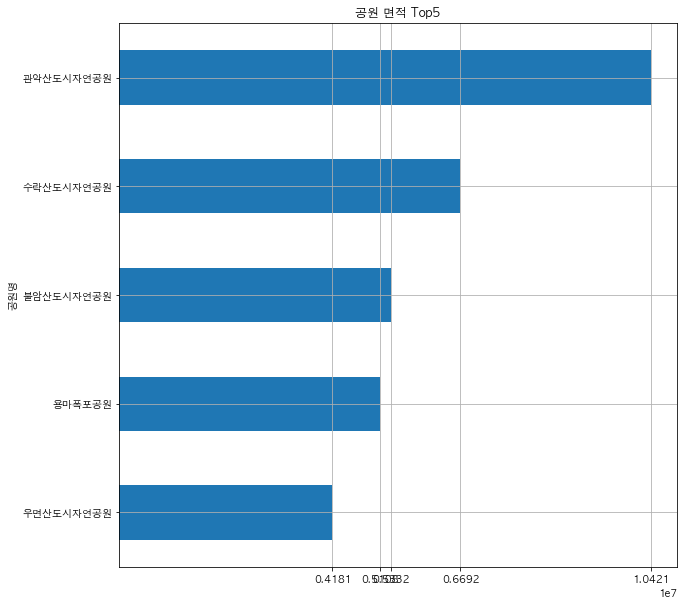

In [98]:
park.sort_values(by='면적',ascending=True).tail()['면적'].plot(kind='barh', grid= True, figsize=(10,10))
plt.xticks(park.sort_values(by='면적',ascending=True).tail()['면적'])
plt.title('공원 면적 Top5')
plt.show()

In [103]:
# 지역구 당 공원갯수 확인
park_gu = park.groupby('지역구').count()
park_gu.head()

,면적,공원주소,lat,lng
지역구,,,,
강남구,7,7,7,7
강동구,7,7,7,7
강북구,3,3,3,3
강서구,9,9,9,9
관악구,2,2,2,2


In [104]:
park_gu['인구수'] = result_CCTV['인구수']
park_gu.head()

,면적,공원주소,lat,lng,인구수
지역구,,,,,
강남구,7,7,7,7,544085
강동구,7,7,7,7,462275
강북구,3,3,3,3,313550
강서구,9,9,9,9,589536
관악구,2,2,2,2,514555


In [105]:
del park_gu['공원주소']
del park_gu['lat']
del park_gu['lng']

In [108]:
park_gu.rename({'면적':'공원 갯수','인구수':'인구수'}, inplace=True, axis=1)

In [109]:
park_gu.head()

,공원 갯수,인구수
지역구,,
강남구,7,544085
강동구,7,462275
강북구,3,313550
강서구,9,589536
관악구,2,514555


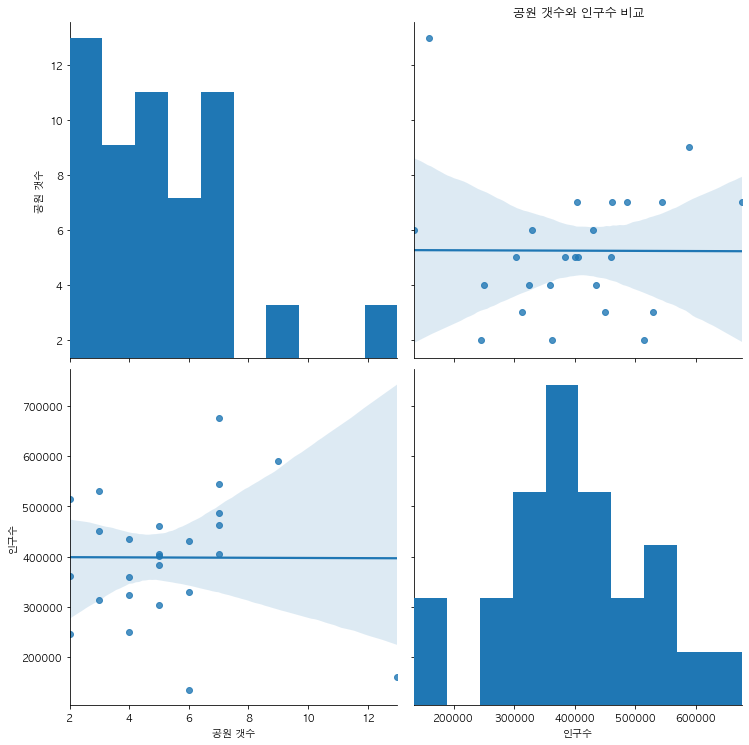

In [110]:
sns.pairplot(park_gu, vars=['공원 갯수','인구수'],kind='reg',size=5)
plt.title('공원 갯수와 인구수 비교')
plt.show()

In [179]:
gu_data = pd.read_csv('./data/gu_report.txt', delimiter = '\t',header=1)
gu_data.head()

,기간,자치구,면적,구성비(%),행정,법정,통,반
0,2019,서울시,605.24,100.0,424,467,"12,713","94,152"
1,2019,종로구,23.91,4.0,17,87,278,"1,479"
2,2019,중구,9.96,1.6,15,74,253,"1,580"
3,2019,용산구,21.87,3.6,16,36,351,"2,550"
4,2019,성동구,16.86,2.8,17,17,466,"3,619"


In [112]:
gu_data.drop([0],inplace=True)
gu_data.set_index('자치구',inplace=True)
gu_data.head()

,기간,면적,구성비(%),행정,법정,통,반
자치구,,,,,,,
종로구,2019,23.91,4.0,17,87,278,"1,479"
중구,2019,9.96,1.6,15,74,253,"1,580"
용산구,2019,21.87,3.6,16,36,351,"2,550"
성동구,2019,16.86,2.8,17,17,466,"3,619"
광진구,2019,17.06,2.8,15,7,363,"2,999"


In [113]:
gu_data = gu_data.sort_index()

In [114]:
park_gu[['구 면적','면적비']] = gu_data[['면적','구성비(%)']]

In [115]:
park_gu.head()

,공원 갯수,인구수,구 면적,면적비
지역구,,,,
강남구,7,544085,39.50,6.5
강동구,7,462275,24.59,4.1
강북구,3,313550,23.60,3.9
강서구,9,589536,41.44,6.8
관악구,2,514555,29.57,4.9


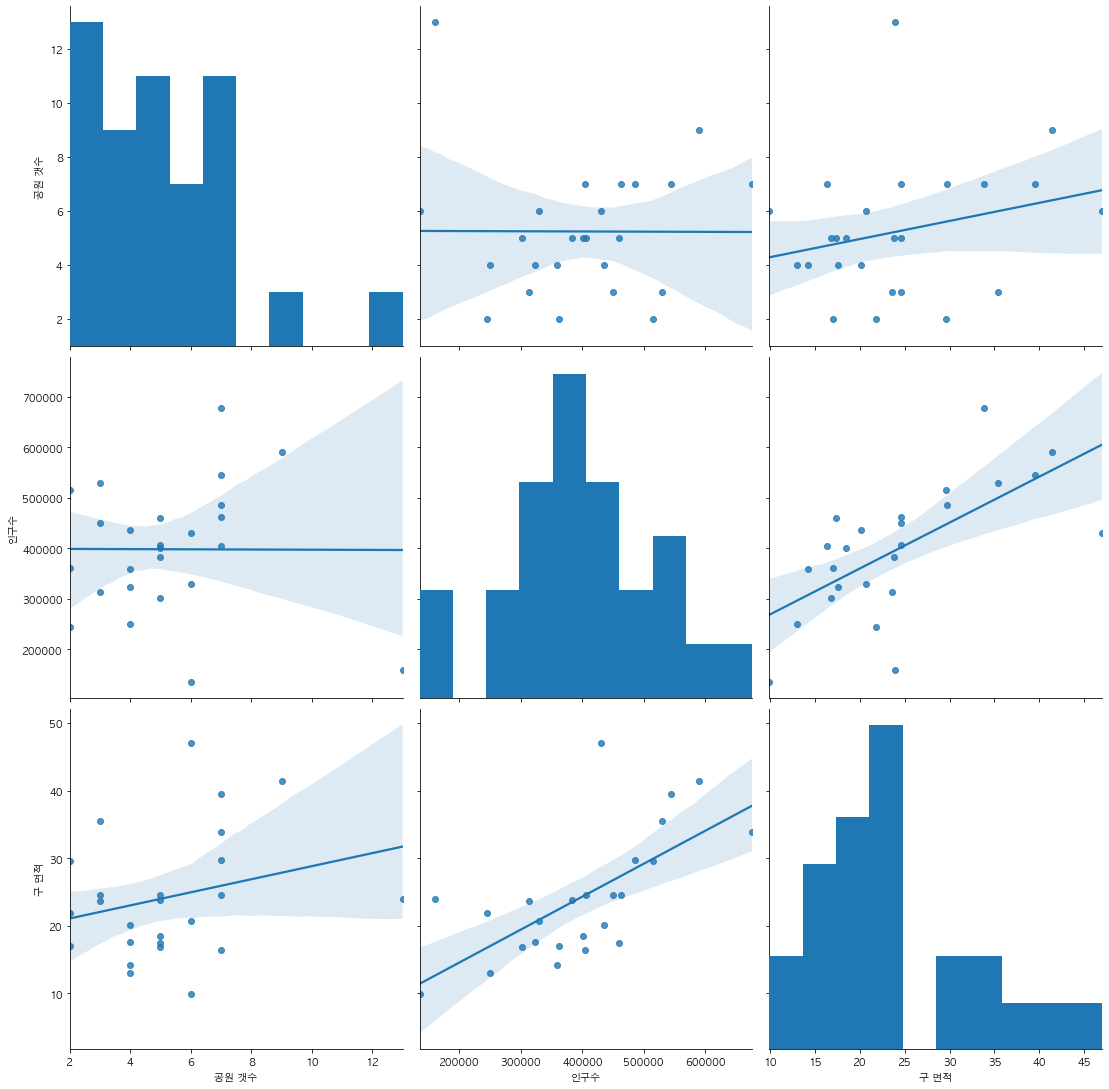

In [126]:
sns.pairplot(park_gu, vars=['공원 갯수','인구수','구 면적'],kind='reg',size=5)
plt.show()

In [128]:
df_tmp = park_gu[['공원 갯수','인구수','구 면적','면적비']]
df_corr = df_tmp.corr()
df_corr

,공원 갯수,인구수,구 면적,면적비
공원 갯수,1.000000,-0.003788,0.254759,0.255445
인구수,-0.003788,1.000000,0.665510,0.663873
구 면적,0.254759,0.665510,1.000000,0.999758
면적비,0.255445,0.663873,0.999758,1.000000


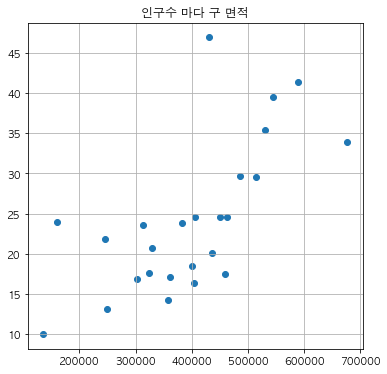

In [132]:
plt.figure(figsize=(6,6))
plt.scatter(park_gu['인구수'], park_gu['구 면적'])
plt.title('인구수 마다 구 면적')
plt.grid()
plt.show()

### 공원 지도에 표시하기

#### 공원 면적따라 지도에 표시하기

In [139]:
park.head()

,면적,공원주소,lat,lng,지역구
공원명,,,,,
남산도시자연공원,2896887.0,서울특별시 중구 삼일대로 231(예장동),37.550140,126.990377,중구
길동생태공원,80683.0,서울특별시 강동구 천호대로 1291(길동생태공원),37.540394,127.154779,강동구
서울숲,480994.0,서울특별시 성동구 뚝섬로 273 (성수동1가),37.543072,127.041798,성동구
월드컵공원,2284085.0,서울특별시 마포구 하늘공원로 84(월드컵공원),37.571805,126.878907,마포구
광화문시민열린마당,8948.0,서울특별시 종로구 세종로 76-2,37.575045,126.978023,종로구


In [160]:
size = ['소형','중형','대형','초대형']
park['크기'] = pd.qcut(park['면적'],4,labels=size)

In [168]:
radius = [1,2,3,4]
park['반지름'] = pd.qcut(park['면적'],4,labels=radius)

In [199]:
map = folium.Map(location=[park.lat.mean(),park.lng.mean()], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = park_gu['인구수'],
                columns = [park.index,park_gu['인구수']],
                fill_color = 'PuRd',
                key_on = 'feature.id')
loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>인구수 바탕지도 위 공원 표시</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))

for i in park.index:
    folium.CircleMarker(
    location=[park.lat[i],park.lng[i]],
    radius=park['반지름'][i]*park['반지름'][i]*np.pi, 
    popup=i,
    color='#3186cc',
    fill=False
).add_to(map)

for i in park.index:
    folium.Marker(
    location=[park.lat[i],park.lng[i]], 
    popup=i,
    color='#3186cc',
    fill=False
).add_to(map)

map

#### 지역구별 공원

In [180]:
park_gu['공원총면적'] = park.groupby('지역구')['면적'].sum()/1000000

In [181]:
park_gu.head()

,공원 갯수,인구수,구 면적,공원총면적,면적비
지역구,,,,,
강남구,7,544085,39.50,3.626398,91807.544304
강동구,7,462275,24.59,1.526387,62073.485157
강북구,3,313550,23.60,2.047054,86739.576271
강서구,9,589536,41.44,2.194152,52947.683398
관악구,2,514555,29.57,10.431453,352771.491376


In [182]:
del park_gu['면적비']

In [183]:
park_gu['면적비'] = park_gu['공원총면적']/park_gu['구 면적']

In [184]:
park_gu.head()

,공원 갯수,인구수,구 면적,공원총면적,면적비
지역구,,,,,
강남구,7,544085,39.50,3.626398,0.091808
강동구,7,462275,24.59,1.526387,0.062073
강북구,3,313550,23.60,2.047054,0.086740
강서구,9,589536,41.44,2.194152,0.052948
관악구,2,514555,29.57,10.431453,0.352771


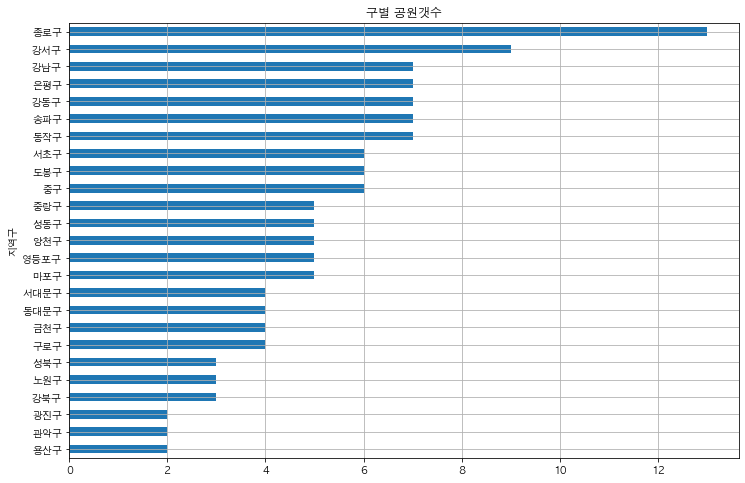

In [198]:
park_gu['공원 갯수'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 공원갯수')
plt.show()

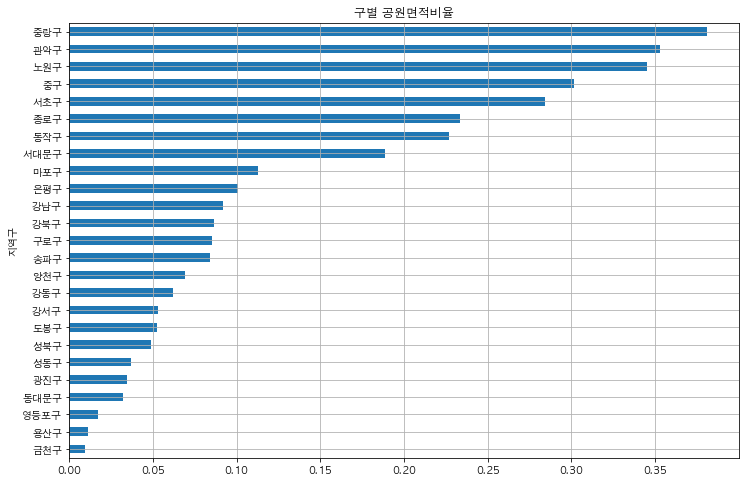

In [195]:
park_gu['면적비'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 공원면적비율')
plt.show()

In [192]:
map = folium.Map(location=[park.lat.mean(),park.lng.mean()], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = park_gu['공원 갯수'],
                columns = [park.index,park_gu['공원 갯수']],
                fill_color = 'PuRd',
                key_on = 'feature.id')
loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>공원갯수</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))

map.save('map-with-title.html')
map

In [187]:
map = folium.Map(location=[park.lat.mean(),park.lng.mean()], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = park_gu['면적비'],
                columns = [park.index,park_gu['면적비']],
                fill_color = 'PuRd',
                key_on = 'feature.id')
loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>구면적 대비 공원총면적</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))

map.save('map-with-title.html')
map

In [194]:
# 갯수에 비해서 공원 면적 차이가 많이 난다는 것을 알 수 있다

In [188]:
park_gu['인구대비 공원면적'] = park_gu['공원총면적']/park_gu['인구수']

In [189]:
map = folium.Map(location=[park.lat.mean(),park.lng.mean()], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = park_gu['인구대비 공원면적'],
                columns = [park.index,park_gu['인구대비 공원면적']],
                fill_color = 'PuRd',
                key_on = 'feature.id')
loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>지역구 인구 대비 공원총면적</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))

map.save('map-with-title.html')
map

### 생활만족도와 함께 분석하기

In [209]:
happy = pd.read_csv('./data/happy_report.txt', delimiter = '\t',header=35)

In [211]:
happy.head()

,2019,지역대분류,동남권,6.47,5.62,6.13,5.84
0,2019,종로구,종로구,6.43,5.68,5.99,5.98
1,2019,중구,중구,6.39,5.22,5.89,5.53
2,2019,용산구,용산구,6.16,5.67,6.11,6.09
3,2019,성동구,성동구,6.47,5.42,5.92,5.84
4,2019,광진구,광진구,6.68,5.78,6.38,5.97


In [214]:
happy = happy[['지역대분류','6.47']]

In [217]:
happy.rename({'지역대분류':'지역구','6.47':'주거만족도'},inplace=True,axis=1)
happy.set_index('지역구',inplace=True)

In [218]:
park_gu['주거 만족도'] = happy['주거만족도']

In [220]:
park_gu.head()

,공원 갯수,인구수,구 면적,공원총면적,면적비,인구대비 공원면적,주거 만족도
지역구,,,,,,,
강남구,7,544085,39.50,3.626398,0.091808,0.000007,6.40
강동구,7,462275,24.59,1.526387,0.062073,0.000003,6.09
강북구,3,313550,23.60,2.047054,0.086740,0.000007,6.20
강서구,9,589536,41.44,2.194152,0.052948,0.000004,6.11
관악구,2,514555,29.57,10.431453,0.352771,0.000020,6.71


In [221]:
df_tmp = park_gu[['공원 갯수','인구수','구 면적','공원총면적','면적비','인구대비 공원면적','주거 만족도']]
df_corr = df_tmp.corr()
df_corr

,공원 갯수,인구수,구 면적,공원총면적,면적비,인구대비 공원면적,주거 만족도
공원 갯수,1.000000,-0.003788,0.254759,0.044334,0.082933,0.354056,0.012334
인구수,-0.003788,1.000000,0.665510,0.248717,-0.007187,-0.191070,0.066436
구 면적,0.254759,0.665510,1.000000,0.564178,0.163199,0.295877,-0.020338
공원총면적,0.044334,0.248717,0.564178,1.000000,0.848872,0.826732,0.203431
면적비,0.082933,-0.007187,0.163199,0.848872,1.000000,0.851444,0.227563
인구대비 공원면적,0.354056,-0.191070,0.295877,0.826732,0.851444,1.000000,0.203496
주거 만족도,0.012334,0.066436,-0.020338,0.203431,0.227563,0.203496,1.000000


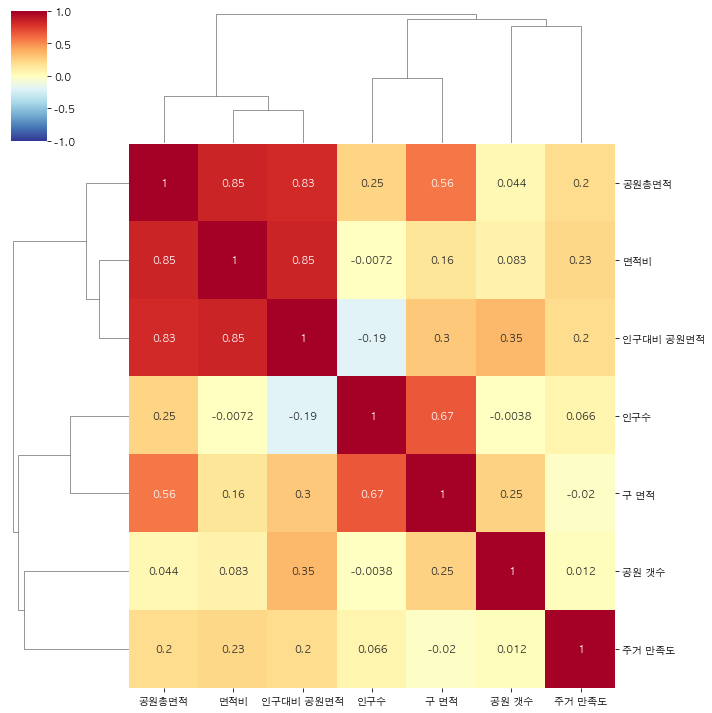

In [223]:
sns.clustermap(df_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

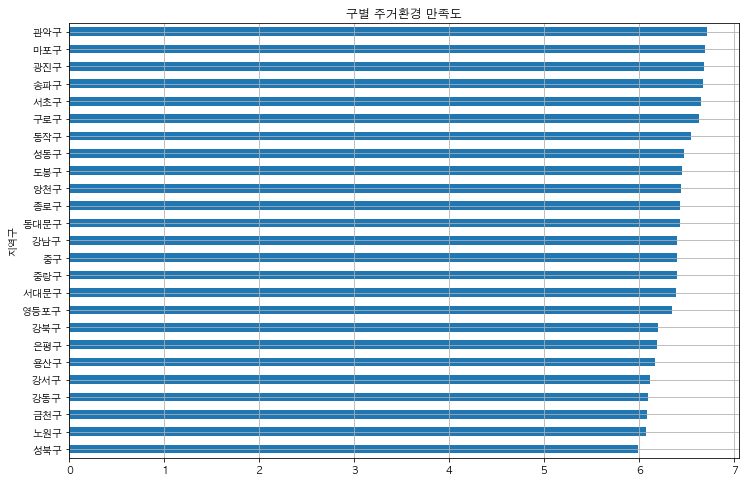

In [224]:
park_gu['주거 만족도'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 주거환경 만족도')
plt.show()

In [227]:
park_gu['인구대비 공원면적 m^2'] = park_gu['인구대비 공원면적']
park_gu['인구대비 공원면적 km^2'] = park_gu['인구대비 공원면적']*1000000

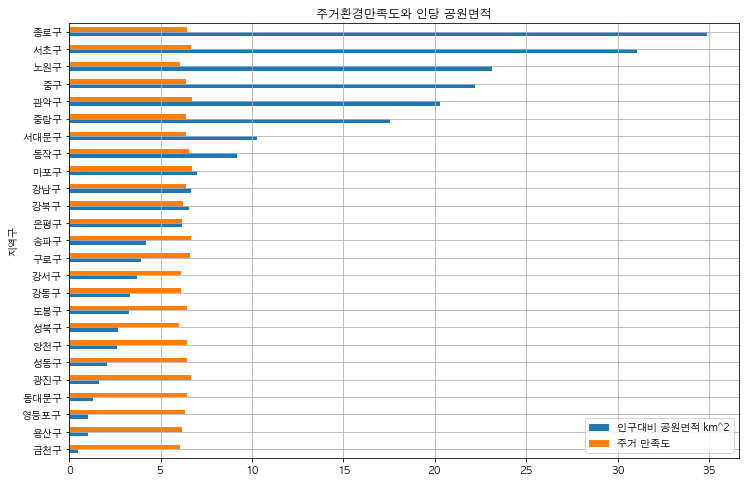

In [230]:
park_gu[['인구대비 공원면적 km^2','주거 만족도']].sort_values(by='인구대비 공원면적 km^2').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('주거환경만족도와 인당 공원면적')
plt.show()

In [231]:
map = folium.Map(location=[park.lat.mean(),park.lng.mean()], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = park_gu['주거 만족도'],
                columns = [park.index,park_gu['주거 만족도']],
                fill_color = 'PuRd',
                key_on = 'feature.id')
loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>지역구 주거 만족도</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))

map.save('map-with-title.html')
map

### 미세먼지와 분석하기

In [233]:
air = pd.read_csv('./data/서울시 실시간 자치구별 대기환경 현황.csv',encoding='euc-kr')
air.head()

,측정날짜,측정소 행정코드,측정소명,통합대기환경지수 등급,통합대기환경지수,지수결정물질,이산화질소 농도(단위:ppm),오존 농도(단위:ppm),일산화탄소 농도(단위:ppm),아황산가스 농도(단위:ppm),미세먼지 농도(단위:㎍/㎥),초미세먼지 농도(단위:㎍/㎥)
0,202011271400,111123,종로구,보통,71,PM25,0.015,0.026,0.4,0.004,27,17
1,202011271400,111121,중구,보통,70,PM10,0.015,0.024,0.4,0.003,30,16
2,202011271400,111131,용산구,보통,67,PM10,0.012,0.019,0.4,0.004,31,16
3,202011271400,111142,성동구,보통,68,PM25,0.024,0.026,0.4,0.004,28,18
4,202011271400,111141,광진구,보통,69,PM25,0.013,0.017,0.5,0.002,25,17


In [234]:
air = air[['측정소명','미세먼지 농도(단위:㎍/㎥)']]

In [236]:
air.rename({'측정소명':'지역구','미세먼지 농도(단위:㎍/㎥)':'미세먼지 농도'},inplace=True,axis=1)

In [237]:
air.head()

,지역구,미세먼지 농도
0,종로구,27
1,중구,30
2,용산구,31
3,성동구,28
4,광진구,25


In [240]:
air.set_index('지역구',inplace=True)

In [248]:
park_gu['미세먼지 농도'] = air['미세먼지 농도']

In [249]:
park_gu.head()

,공원 갯수,인구수,구 면적,공원총면적,면적비,인구대비 공원면적,주거 만족도,인구대비 공원면적 m^2,인구대비 공원면적 km^2,미세먼지 농도
지역구,,,,,,,,,,
강남구,7,544085,39.50,3.626398,0.091808,0.000007,6.40,0.000007,6.665131,22
강동구,7,462275,24.59,1.526387,0.062073,0.000003,6.09,0.000003,3.301903,26
강북구,3,313550,23.60,2.047054,0.086740,0.000007,6.20,0.000007,6.528637,30
강서구,9,589536,41.44,2.194152,0.052948,0.000004,6.11,0.000004,3.721829,28
관악구,2,514555,29.57,10.431453,0.352771,0.000020,6.71,0.000020,20.272766,27


In [250]:
for i in park_gu.index:
    try:
        float(park_gu['미세먼지 농도'][i])
    except:
        print(park_gu['미세먼지 농도'][i],i)

점검중 서초구


In [253]:
park_gu['미세먼지 농도']['서초구'] = 0

In [256]:
park_gu['미세먼지 농도'] = park_gu['미세먼지 농도'].astype(float)

In [257]:
park_gu['미세먼지 농도']['서초구'] = park_gu['미세먼지 농도'].mean()

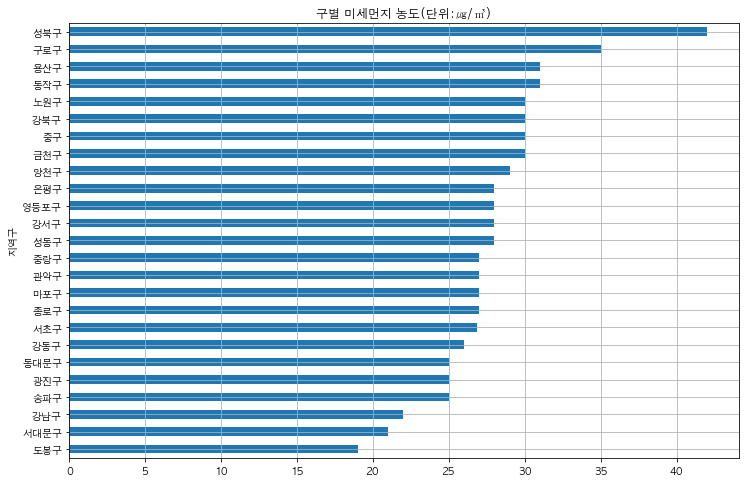

In [260]:
park_gu['미세먼지 농도'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 미세먼지 농도(단위:㎍/㎥)')
plt.show()

In [283]:
map = folium.Map(location=[park.lat.mean(),park.lng.mean()], zoom_start=11,
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = park_gu['미세먼지 농도'],
                columns = [park.index,park_gu['미세먼지 농도']],
                fill_color = 'PuRd',
                key_on = 'feature.id')
loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>지역구 미세먼지 농도</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))

map.save('map-with-title.html')
map

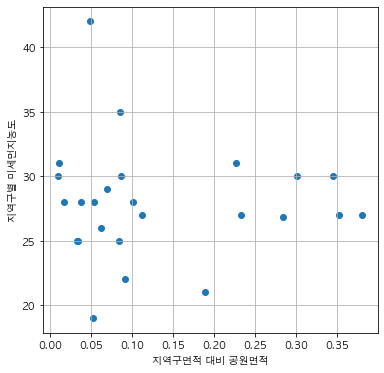

In [270]:
plt.figure(figsize=(6,6))
plt.scatter(park_gu['면적비'], park_gu['미세먼지 농도'])
plt.xlabel('지역구면적 대비 공원면적')
plt.ylabel('지역구별 미세먼지농도')
plt.grid()
plt.show()

In [271]:
fp1 = np.polyfit(park_gu['면적비'], park_gu['미세먼지 농도'], 1)
fp1

array([-1.44560976, 28.10448331])

In [274]:
f1 = np.poly1d(fp1)
fx = np.linspace(0.0,0.5, 100)

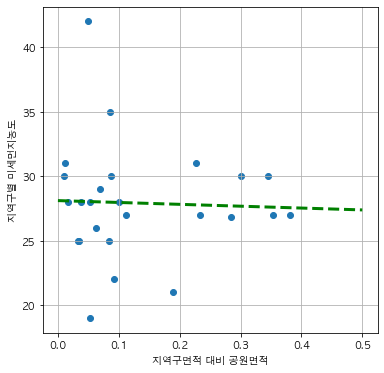

In [275]:
plt.figure(figsize=(6,6))
plt.scatter(park_gu['면적비'], park_gu['미세먼지 농도'])
plt.xlabel('지역구면적 대비 공원면적')
plt.ylabel('지역구별 미세먼지농도')
plt.grid()
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.show()

In [276]:
fp1 = np.polyfit(park_gu['면적비'], park_gu['미세먼지 농도'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(0.0,0.5, 100)

park_gu['오차'] = np.abs(park_gu['면적비']- f1(park_gu['미세먼지 농도']))

df_sort = park_gu.sort_values(by='오차', ascending=False)
df_sort.head()

,공원 갯수,인구수,구 면적,공원총면적,면적비,인구대비 공원면적,주거 만족도,인구대비 공원면적 m^2,인구대비 공원면적 km^2,미세먼지 농도,오차
지역구,,,,,,,,,,,
성북구,3,449871,24.57,1.198327,0.048772,0.000003,5.99,0.000003,2.663712,42.0,32.659899
구로구,4,435751,20.12,1.721011,0.085537,0.000004,6.63,0.000004,3.949529,35.0,22.577396
동작구,7,404617,16.35,3.706738,0.226712,0.000009,6.54,0.000009,9.161103,31.0,16.936131
용산구,2,244953,21.87,0.247194,0.011303,0.000001,6.16,0.000001,1.009149,31.0,16.720722
노원구,3,529532,35.44,12.235699,0.345251,0.000023,6.07,0.000023,23.106628,30.0,15.609061


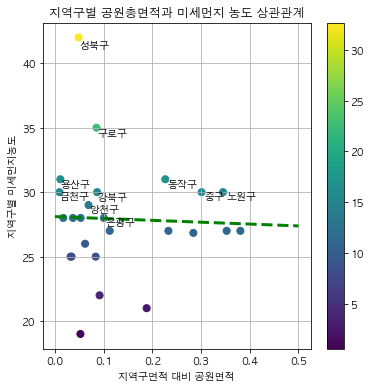

In [281]:
plt.figure(figsize=(6,6))
plt.scatter(park_gu['면적비'], park_gu['미세먼지 농도'],c=park_gu['오차'], s=50)
for n in range(10):
    plt.text(df_sort['면적비'][n]*1.02, df_sort['미세먼지 농도'][n]*0.98, df_sort.index[n] , fontsize=10)
plt.xlabel('지역구면적 대비 공원면적')
plt.ylabel('지역구별 미세먼지농도')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

plt.title('지역구별 공원총면적과 미세먼지 농도 상관관계')
plt.colorbar()
plt.grid()
plt.show()

In [282]:
# 미세먼지랑 공원이랑은 큰 상관 없는것 같다....